# TP2 : Les arbres de décision

In [265]:
import numpy as np
import pandas as pd

# I.1  lecture des données 

In [266]:
#lire le fichier csv
data = pd.read_csv("Tennis.csv")
data

,Outlook,Temp,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [267]:
# séparer les données en: entrées et sorties
features = data.iloc[:,:-1] #les caractéristiques
labels = data.iloc[:,-1]  #les résulats (classes)
features.head()

,Outlook,Temp,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [268]:
X=np.array(features)
y=np.array(labels)

# I.2 Implementation de l'algorithme ID3

### I-2.1 Calcul de l'entropie
Soit\$A\$ un attribut et soit V l'ensemble de ces valeurs possibles.


L'entropie de \$A\$ est calculée comme suit : \$\$H(A) = -
\sum\limits\_{v \in V} p(A=v) \log_2 p(A=v)\$\$
Avec V= np.unique(A)
 

$\$p(A=v) = \frac{\|\\{x / x \in A \text{ et } x = v\\}\|}{\|A\|}\$\$

|A| represente la taille du vecteur attribut A

In [289]:
# TODO compléter la fonction d'entropie
 
def H(A):
     
    return entropie 
 
 

### I-2.2 Le gain d'information

Le gain d'information est la différence entre l'entropie
avant et après la division d'un ensemble \$S\$ selon l'attribut \$A\$.

Soit S l'ensemble à diviser et soit A les attributs de S. L'attribut A 
peut prendre V valeurs possibles.

Le gain d'information se calcule comme suit :

\$\$IG(S, A) = H(S) - \sum\_{v \in V} p(S\_{A=v}) H(S\_{A=v})\$\$


In [290]:
# TODO compléter cette fonction 
# elle doit rendre le gain d'information 

def IG(S, A):
    
     
    return IG_S, entropie

    
 

### I.2.3 Sélection du meilleur attribut

Le meilleur attribut est celui qui maximise le gain d'information

In [292]:
# TODO  cette fonction doit rendre l'index du meilleur attribut et le gain d'information 
def best_attribute(X,Y): 
    # X est l'ensemble de données (les features)
    # Y est le vecteur label 
    
     
    
    return index, val_ig

    
    
 
 

### I.2.4 Division de l'ensemble S en des sous_ensembles

In [293]:
# création à partir d'un ensemble df de sous-ensembles selon un attribut node et sa valeur value

def split(df, node, value):
    
    df=df[df.iloc[:,node] == value].reset_index(drop=True)
   
    return df
 

### I.2.5 Creation de l'arbre de décision 

In [273]:
def ID3algorithm(df,tree=None):
    target = df.keys()[-1]
    X=np.array(df.iloc[:,:-1])
    y=np.array(df.iloc[:,-1])
    # selection du meilleur attribut qui maximise le gain d'information
    node = best_attribute(X,y)  
    name_node=df.keys()[node[0]]
    ind_attribute=node[0]
   # print(name_node)
    
    # extraire les  valeurs possibles de l'attribut
    attributeValues = np.unique(X[:,ind_attribute])
    # creer un dictionnaire vide qui sera remplit récursivement 
    if tree is None:               #  le noeud racine 
        tree = {}
        tree[name_node] = {}
    # boucler sur chaque attribut pour la création des noeuds de  l'arbre  
     
    for value in attributeValues:
        
        # subset est un sous_ensemble obtenu aprés la division de l'ensemble de départ 
        subset = split(df, node[0] , value)
         
        # verifier l'homogéneinté du sous_ensemble
        
        targetValues, counts = np.unique(subset[target], return_counts=True)
        
        # si le sous_ensemble contient une seule classe (un seul label) c'est une feuille
        if len(counts) == 1:
            tree[name_node][value] = targetValues[0]
        
        else:
            # sinon on le décompose 
            tree[name_node][value] = ID3algorithm(subset)
                                                         
    return tree

### I.2.6 Entrainer le modele 

In [274]:
data_train=data
decisionTree = ID3algorithm(data_train)

### I.2.7 Afficher le modele

In [295]:
 def print_decision_tree(tree, indent=0):
    """
    This function takes a nested dictionary and prints it as a decision tree.
    
    Parameters:
    tree (dict): The nested dictionary to be printed
    indent (int): The number of spaces to indent each level of the tree
    
    Returns:
    None
    """
    try:
        # Check if the argument is a dictionary
        if not isinstance(tree, dict):
            raise TypeError("The argument must be a dictionary")
        
        # Loop through the keys and values in the dictionary
        for key, value in tree.items():
            # Print the key with appropriate indentation
            print(" " * indent + str(key))
            
            # If the value is a dictionary, recursively call the function with increased indentation
            if isinstance(value, dict):
                print_decision_tree(value, indent + 4)
            # If the value is not a dictionary, print it with appropriate indentation
            else:
                print(" " * (indent + 4) + str(value))
    except TypeError as e:
        # Log the error
        print(f"Error: {e}") 
        
        
 # affichage de l'arbre de decision        
print_decision_tree(decisionTree)

L'arbre de decision
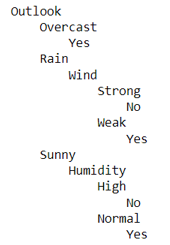

### I.2.8 Tester le modele
 

In [296]:
X_test = np.array([["Sunny","Mild","High", "Strong"],
                ["Sunny","Mild","Normal", "Strong"],
                ["Rain","Hot","Normal", "Weak"],
                ["Sunny","Mild","High", "Strong"]])
y_test = np.array(["No","Yes","Yes","No"])  

# Arranging in DataFrame
data_test = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1) 
data_test = pd.DataFrame(data_test,columns=['Outlook', 'Temperature', 'Humidity', 'Wind', 'Decision'])
print(data_test)

def testing_ID3_DT(d, t):
    res = []
    for _, e in t.iterrows():
        res.append(prediction(d, e))
    return res

def prediction(d, e):
    
    current_node = list(d.keys())[0]
    current_branch = d[current_node][e[current_node]]
   
    if isinstance(current_branch, str):
        # C'est une feuille
        return current_branch
    # else use that node as new searching subtree
    else:
        # c'est un noeud à explorer
        return prediction(current_branch, e)
 
print("Prediction")
Y_pred=testing_ID3_DT(decisionTree, data_test)
Y_test=data_test.iloc[:,-1]
data_p=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})  
print(data_p)
from sklearn.metrics import accuracy_score
print('accuracy=')
print(accuracy_score(Y_test, Y_pred))


  Outlook Temperature Humidity    Wind Decision
0   Sunny        Mild     High  Strong       No
1   Sunny        Mild   Normal  Strong      Yes
2    Rain         Hot   Normal    Weak      Yes
3   Sunny        Mild     High  Strong       No


In [297]:
 # Le rapport de classification
from sklearn.metrics import classification_report, confusion_matrix  
cm=confusion_matrix(Y_test, Y_pred)
 
#print(classification_report(Y_test, Y_pred)) 

In [278]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(X_test, y_test, cmap=pl.cm.Blues)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

ImportError: cannot import name 'ConfusionMatrixDisplay' from 'sklearn.metrics' (C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
##  Si on ajoute du pré-élagage selon le nombre de données dans le noeud ob bien selon le niveau de profondeur accepté,
## où allons nous faire ces changements dans le code suivant
## 

In [ ]:
    def ID3algorithm(df,tree=None):
    target = df.keys()[-1]
    X=np.array(df.iloc[:,:-1])
    y=np.array(df.iloc[:,-1])
    # selection du meilleur attribut qui maximise le gain d'information
    node = best_attribute(X,y)  
    name_node=df.keys()[node[0]]
    ind_attribute=node[0]
   # print(name_node)
    
    # extraire les  valeurs possibles de l'attribut
    attributeValues = np.unique(X[:,ind_attribute])
    # creer un dictionnaire vide qui sera remplit récursivement 
    if tree is None:               #  le noeud racine 
        tree = {}
        tree[name_node] = {}
    # boucler sur chaque attribut pour la création des noeuds de  l'arbre  
     
    for value in attributeValues:
        
        # subset est un sous_ensemble obtenu aprés la division de l'ensemble de départ 
        subset = split(df, node[0] , value)
         
        # verifier l'homogéneinté du sous_ensemble
        
        targetValues, counts = np.unique(subset[target], return_counts=True)
        
        # si le sous_ensemble contient une seule classe (un seul label) c'est une feuille
        if len(counts) == 1:
            tree[name_node][value] = targetValues[0]
        
        else:
            # sinon on le décompose 
            tree[name_node][value] = ID3algorithm(subset)
                                                         
    return tree


### I.9  Avec DecisionTreeClassifier de Sklearn 

In [279]:
# convertir le dataset_train
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=data.apply(string_to_int.fit_transform) #fit and transform it
df

,Outlook,Temp,Humidity,Wind,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [280]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [281]:
#Division du dataset:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 
X_train=X
y_train=y


In [282]:
# perform training 
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train)                                               
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [283]:
# convertir le dataset_test
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=data_test.apply(string_to_int.fit_transform) #fit and transform it
df

,Outlook,Temperature,Humidity,Wind,Decision
0,1,1,0,0,0
1,1,1,1,0,1
2,0,0,1,1,1
3,1,1,0,0,0


In [284]:
X_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]

In [285]:
#Predict for test dataset
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
Y_pred= classifier.predict(X_test)  
 
print("Prediction")
Y_test=df.iloc[:,-1]
data_p=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})  
print(data_p)
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Prediction
   Actual  Predicted
0       0          0
1       1          0
2       1          1
3       0          0
Accuracy: 0.75


In [286]:
### I.10 Evaluation 

In [287]:
 # Le rapport de classification
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, Y_pred))  
print(classification_report(Y_test, Y_pred)) 


[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [288]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
 

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(X_test, y_test, cmap=pl.cm.Blues)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)